### Wednesday, January 3, 2024

[image-to-image](https://huggingface.co/docs/diffusers/using-diffusers/img2img)

This all runs.

# Text-guided image-to-image generation

The [StableDiffusionImg2ImgPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/img2img#diffusers.StableDiffusionImg2ImgPipeline) lets you pass a text prompt and an initial image to condition the generation of new images.

Before you begin, make sure you have all the necessary libraries installed:

In [ ]:
# uncomment to install the necessary libraries in Colab
#!pip install diffusers transformers ftfy accelerate

Get started by creating a [StableDiffusionImg2ImgPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/img2img#diffusers.StableDiffusionImg2ImgPipeline) with a pretrained Stable Diffusion model like [`nitrosocke/Ghibli-Diffusion`](https://huggingface.co/nitrosocke/Ghibli-Diffusion).

In [1]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("nitrosocke/Ghibli-Diffusion", torch_dtype=torch.float16).to(
    device
)

# 75m 55.7s

model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [2]:
!ls /root/.cache/huggingface/hub

models--CompVis--stable-diffusion-v1-4
models--TheBloke--CodeLlama-34B-Instruct-GPTQ
models--TheBloke--Llama-2-13b-Chat-GPTQ
models--google--ddpm-cat-256
models--google--ddpm-celebahq-256
models--google--ddpm-church-256
models--microsoft--Orca-2-13b
models--mistralai--Mistral-7B-Instruct-v0.2
models--nitrosocke--Ghibli-Diffusion
models--runwayml--stable-diffusion-v1-5
models--stabilityai--sd-vae-ft-mse
version.txt
version_diffusers_cache.txt


In [ ]:
# docker cp c8324b70601d:///root/.cache/huggingface/hub/models--nitrosocke--Ghibli-Diffusion /home/rob/Data3/huggingface/transformers
# Successfully copied 5.48GB to /home/rob/Data3/huggingface/transformers

Download and preprocess an initial image so you can pass it to the pipeline:

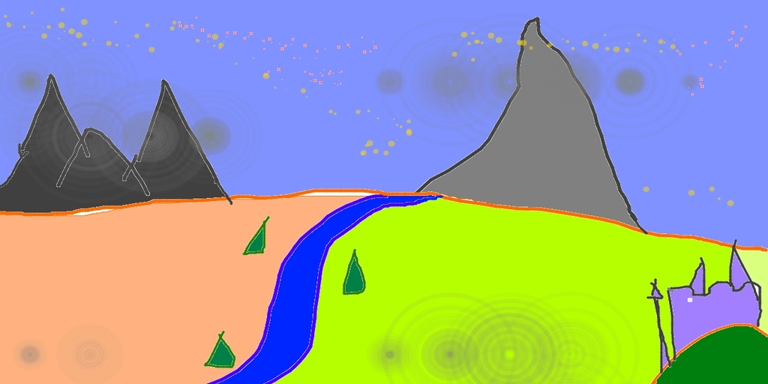

In [3]:
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image.thumbnail((768, 768))
init_image

<div class="flex justify-center">
    <img src="https://huggingface.co/datasets/YiYiXu/test-doc-assets/resolve/main/image_2_image_using_diffusers_cell_8_output_0.jpeg"/>
</div>

<Tip>

💡 `strength` is a value between 0.0 and 1.0 that controls the amount of noise added to the input image. Values that approach 1.0 allow for lots of variations but will also produce images that are not semantically consistent with the input.

</Tip>

Define the prompt (for this checkpoint finetuned on Ghibli-style art, you need to prefix the prompt with the `ghibli style` tokens) and run the pipeline:

  0%|          | 0/37 [00:00<?, ?it/s]

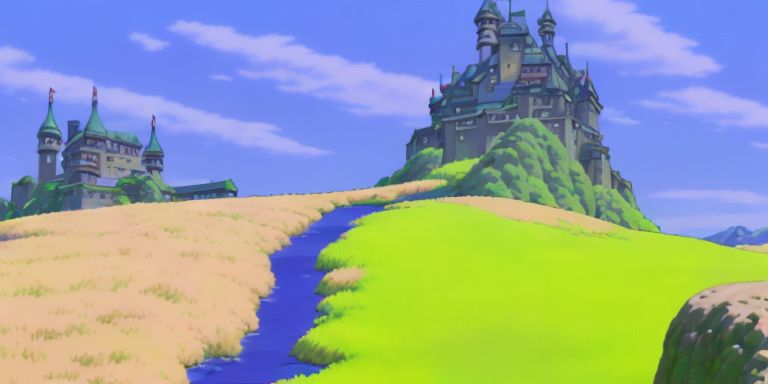

In [4]:
prompt = "ghibli style, a fantasy landscape with castles"
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image

<div class="flex justify-center">
    <img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/ghibli-castles.png"/>
</div>

You can also try experimenting with a different scheduler to see how that affects the output:

  0%|          | 0/37 [00:00<?, ?it/s]

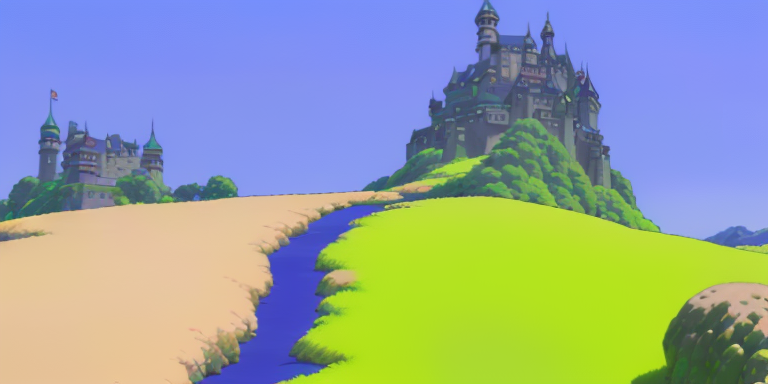

In [5]:
from diffusers import LMSDiscreteScheduler

lms = LMSDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = lms
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]
image

<div class="flex justify-center">
    <img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/lms-ghibli.png"/>
</div>

Check out the Spaces below, and try generating images with different values for `strength`. You'll notice that using lower values for `strength` produces images that are more similar to the original image.

Feel free to also switch the scheduler to the [LMSDiscreteScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/lms_discrete#diffusers.LMSDiscreteScheduler) and see how that affects the output.

<iframe
	src="https://stevhliu-ghibli-img2img.hf.space"
	frameborder="0"
	width="850"
	height="500"
></iframe>